In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [60]:
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [51]:
img[100:-100,100:-100,0] = 0
img[100:-100,100:-100,2] = 0

In [37]:
img.shape

(340, 340, 3)

In [42]:
replicate = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REPLICATE)


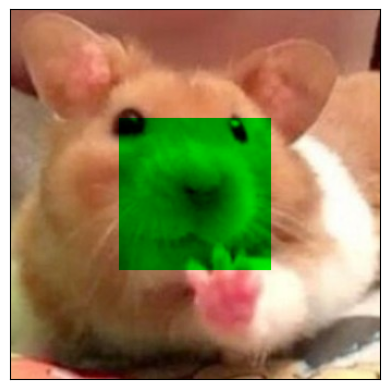

In [53]:
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.show()

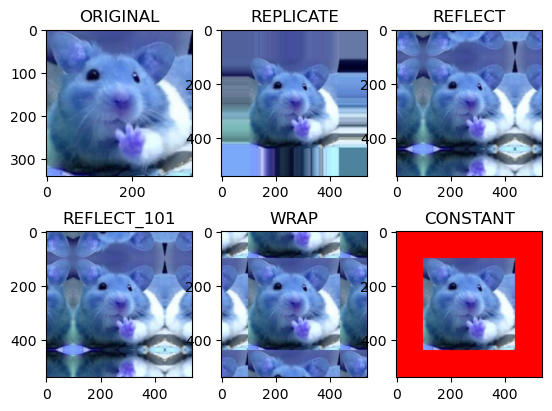

In [48]:
BLUE = [255,0,0]
img = cv2.imread('image.jpg')
replicate = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

P.41

In [12]:
img1 = cv2.imread('mch.jpg')
img2 = cv2.imread('opencv.png')
alpha = 0.9
dst = cv2.addWeighted(img1,alpha,img2,1-alpha,0)


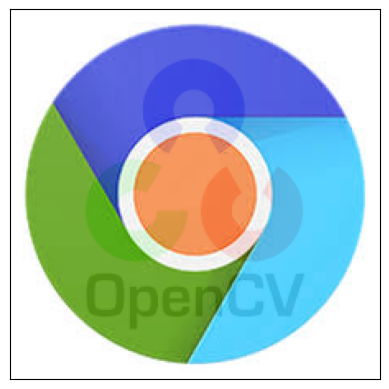

In [11]:
plt.imshow(dst)
plt.xticks([]), plt.yticks([]) 
plt.show()

In [94]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)

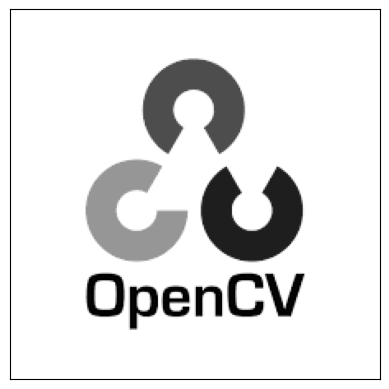

In [97]:
plt.imshow(img2gray,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

Bitwise Operations

In [24]:
# Load two images
img1 = cv2.imread('mch.jpg')
img2 = cv2.imread('opencv.png')

In [26]:
rows,cols,channels = img1.shape
print(rows,cols,channels)

225 225 3


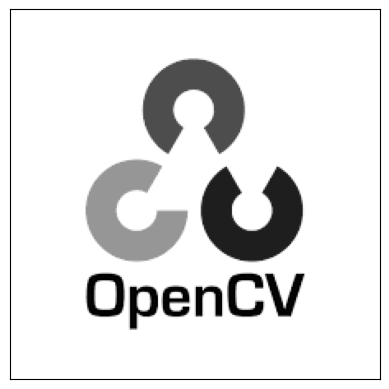

In [27]:
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

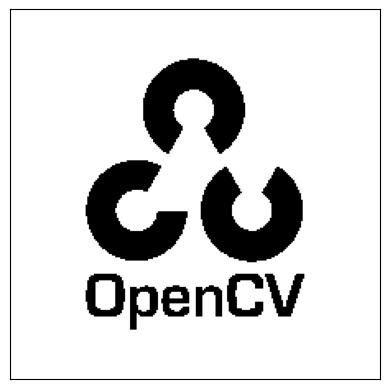

In [36]:
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

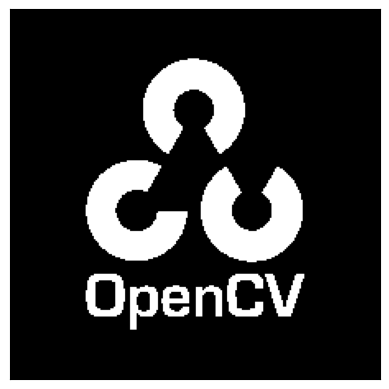

In [39]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


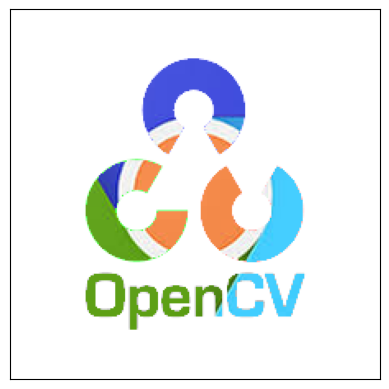

In [40]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


In [21]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()